# Step 8: Burgers' Equation in 2D

Remember, Burgers'equation can generate discontinuous solutions from an initial condition that is smooth, i.e., can develop "shocks". We want to see this in two dimensions now!

Here is our coupled set of PDEs:

$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = \nu \bigg(\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2}\bigg)
$$

$$
\frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = \nu \bigg(\frac{\partial^2v}{\partial x^2} + \frac{\partial^2v}{\partial y^2}\bigg)
$$

We now proceed to discretize each term:

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \qquad \nu \bigg( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \bigg)
$$

$$
\frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \qquad \nu \bigg( \frac{v_{i+1,j}^n - 2v_{i,j}^n+ v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \bigg)
$$

And now, we will rearrange each of these equations for the only unknow: the two components $u$, $v$ of the solution at the next time step:

$$
u_{i,j}^{n+1} = u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n)+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j+1}^n)
$$


$$
v_{i,j}^{n+1} =  v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n)+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j+1}^n)
$$
 


# Analysis

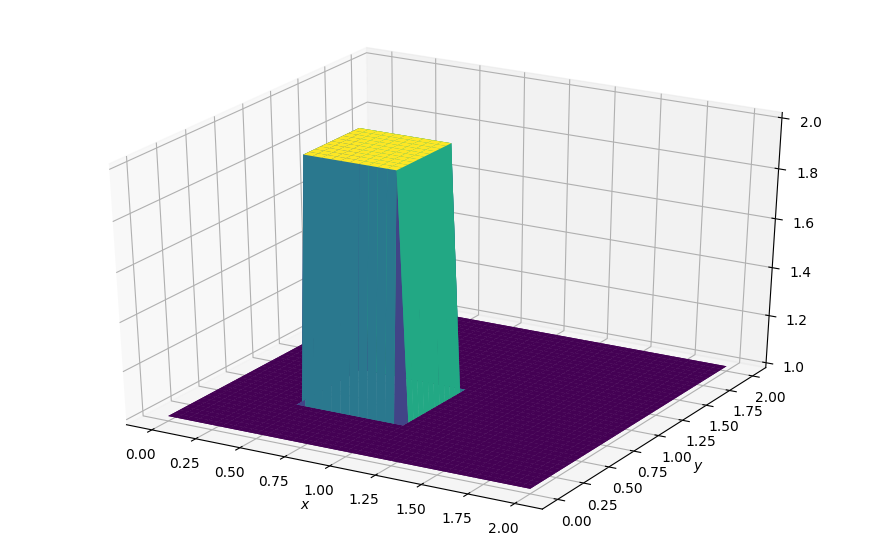

In [1]:
# -------
# Imports
# -------

import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# ---------
# Variables
# ---------

nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
v = np.copy(u)
un = np.copy(u)
vn = np.copy(u)
comb = np.copy(u)

# ----------------
# Init. Conditions
# ----------------

u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

# --------
# I.C Plot
# --------

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [8]:
def burgers(nt):
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2

    for n in range(nt + 1):
        un = np.copy(u)
        vn = np.copy(v)

        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                         dt / dx * un[1:-1, 1:-1] * 
                         (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                         dt / dy * vn[1:-1, 1:-1] * 
                         (un[1:-1, 1:-1] - un[0:-2, 1:-1]) + 
                         nu * dt / dx**2 * 
                         (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) + 
                         nu * dt / dy**2 * 
                         (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))

        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                         dt / dx * un[1:-1, 1:-1] *
                         (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         dt / dy * vn[1:-1, 1:-1] * 
                        (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) + 
                         nu * dt / dx**2 * 
                         (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         nu * dt / dy**2 *
                         (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))

        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1

        v[0, :] = 1
        v[-1, :] = 1
        v[:, 0] = 1
        v[:, -1] = 1
    
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    
    ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
    ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

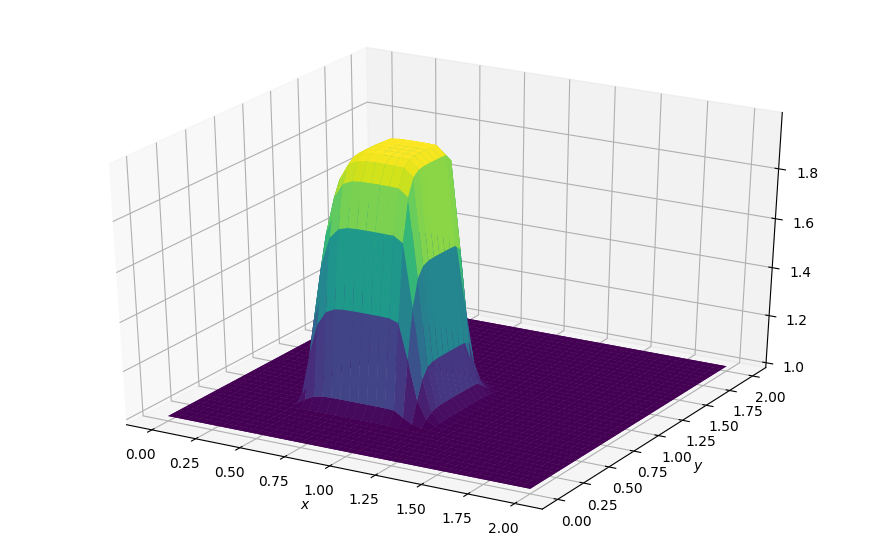

In [9]:
burgers(120)

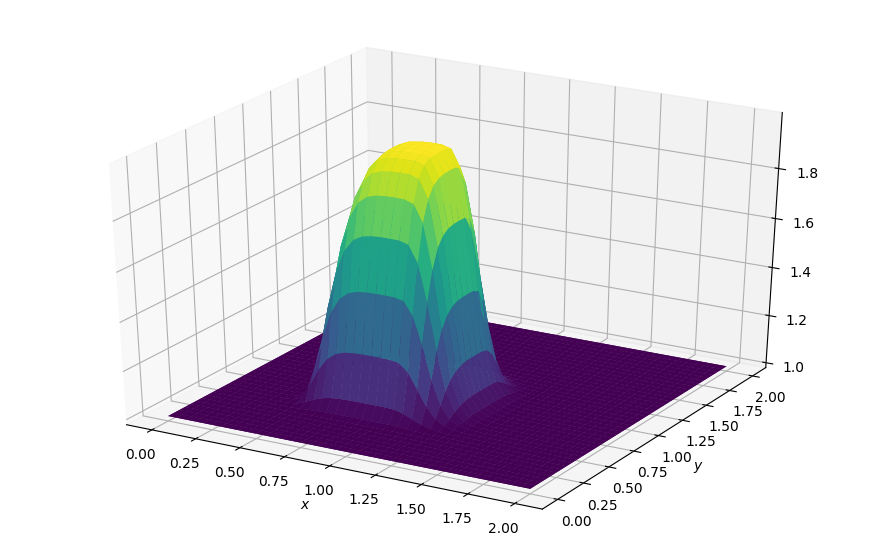

In [10]:
burgers(240)

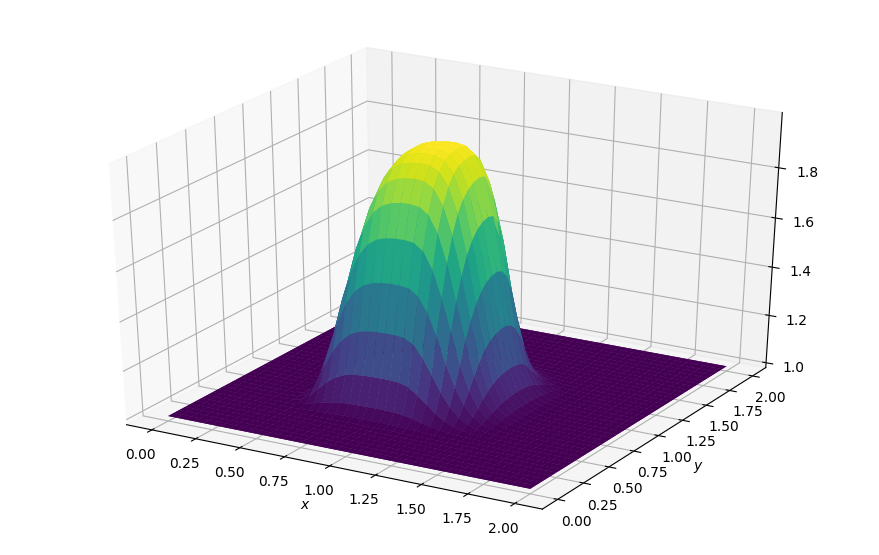

In [11]:
burgers(360)

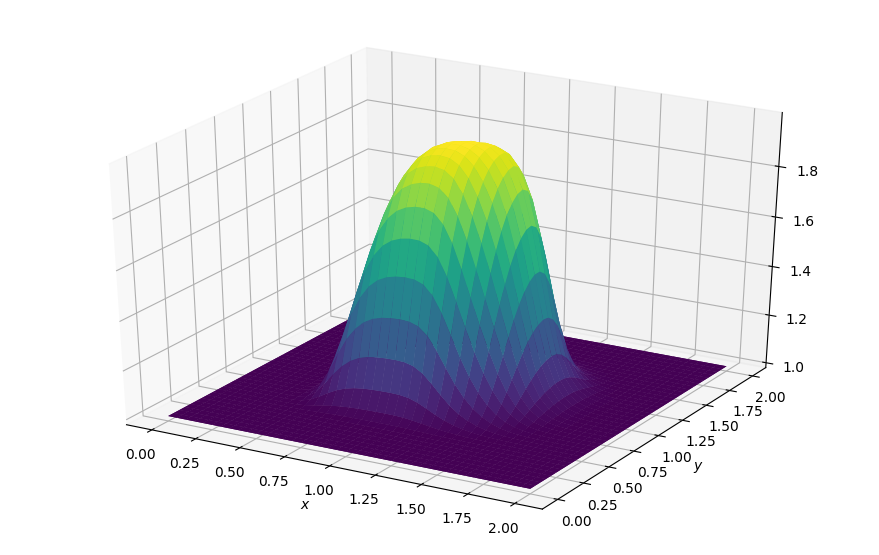

In [12]:
burgers(480)

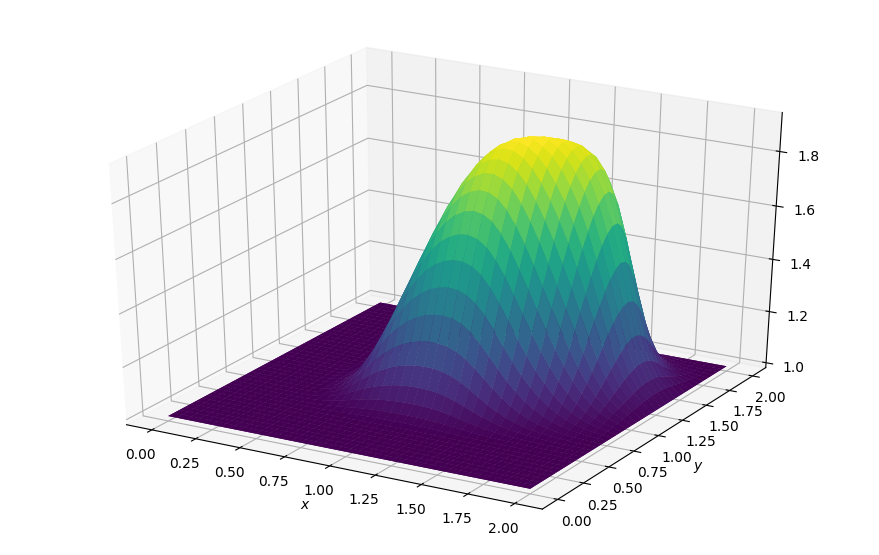

In [13]:
burgers(1000)